# Sentiment Analysis Project
## Project Summary
This is part of the fellowship application coding challenge, i have chosen to perform a sentiment analysis on the IMDB Dataset of 50K Movie Reviews dataset.
## About Dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

## Exploratory Analysis
Lets see what kind of the dataset we have by loading the data into the dataframe first

In [1]:
##lets import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
## lets load the data in movies reviews dataframe
movie_reviews = pd.read_csv('./data/IMDB Dataset.csv')

In [3]:
## lets explore the data
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


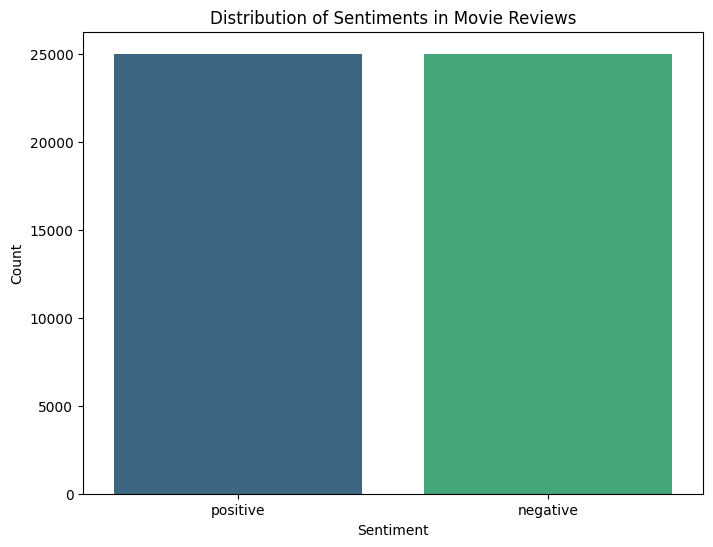

In [4]:
## lets see how the sentiments are distributed in our data
# Count the number of occurrences for each sentiment
sentiment_counts = movie_reviews['sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index,palette='viridis')
plt.title('Distribution of Sentiments in Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Data Preprocessing
As we are dealing with text, it is important to tokenize the texts as well as make sure we convert the text to numbers as the machine learning algorithms takes on numerical parameters 

In [5]:
# Label Encoding
movie_reviews['sentiment'] = movie_reviews['sentiment'].map({'positive': 1, 'negative': 0})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(movie_reviews['review'], movie_reviews['sentiment'], test_size=0.2, random_state=42)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

## ensuring that all sequences of tokens have the same length for neaural networks
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

## Building the base model - Naive Bayes
Naive Bayes is a probabilistic classifier that relies on Bayes' Theorem. It is called 'naive' because it assumes that the features (in this case, words or tokens) are independent of each other, which is often not the case in natural language.

In [6]:
# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 84.88%
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Building the LSTM model
LSTM is a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequence data. It mitigates the vanishing gradient problem common in traditional RNNs.

In [7]:
# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5


C:\Users\mw50000150\Downloads\NLP_CHALLENGE\nlp_challenge\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 50s 96ms/step - accuracy: 0.7278 - loss: 0.5284 - val_accuracy: 0.8490 - val_loss: 0.3539
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.8639 - loss: 0.3289 - val_accuracy: 0.8220 - val_loss: 0.3968
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.8793 - loss: 0.2961 - val_accuracy: 0.8541 - val_loss: 0.3474
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 96ms/step - accuracy: 0.8947 - loss: 0.2601 - val_accuracy: 0.8569 - val_loss: 0.3540
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 98ms/step - accuracy: 0.9117 - loss: 0.2262 - val_accuracy: 0.8583 - val_loss: 0.3571
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8662 - loss: 0.3413
Accuracy: 86.39%


In [8]:
## Lets try to use the trained model on new data
new_reviews = ['I love this movie!', 'It was a terrible film.']
new_reviews_seq = tokenizer.texts_to_sequences(new_reviews)
new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=max_length)

predictions = model.predict(new_reviews_pad)
predictions = ['positive' if p > 0.5 else 'negative' for p in predictions]

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
['positive', 'negative']
